# Data analysis
This notebook about data analysis of some match in game 'Dota 2'. Where we have 2 teams: **dire** and **radiant** and first one is winner.
Firstly, we start with some visualization data of match.

### First graph of advantages in gold and experience of teams.
(if one has advantage, second has disadvantage)

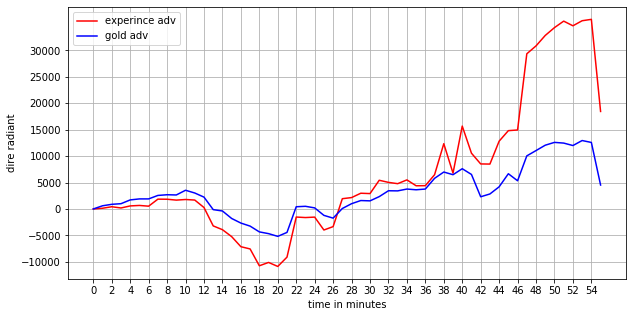

In [56]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

file = open("match.json",)
data = json.load(file)
file.close()

y_gold = np.array(data["radiant_gold_adv"])
y_xp = np.array(data["radiant_xp_adv"])
x = np.arange(0, y_xp.size)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y_xp, color="red", label="experince adv")
ax.plot(x, y_gold, color="blue", label="gold adv")
ax.grid()
ax.set_xticks(np.arange(np.min(x), np.max(x), 2))
ax.set_yticks(np.arange(-10000, 35000, 5000))
ax.set_xlabel("time in minutes")
ax.set_ylabel("dire radiant")
ax.legend()

How we can see from the graph, first 10 minutes team **radiant team** lead the game in gold and experience. But next 10 minutes **dire team** succed take away it from them. However **radiant team** get back it and until end of the game was leader, even so it did not guarantee victory.

### Next 4 graphs present total gold and experience in time.


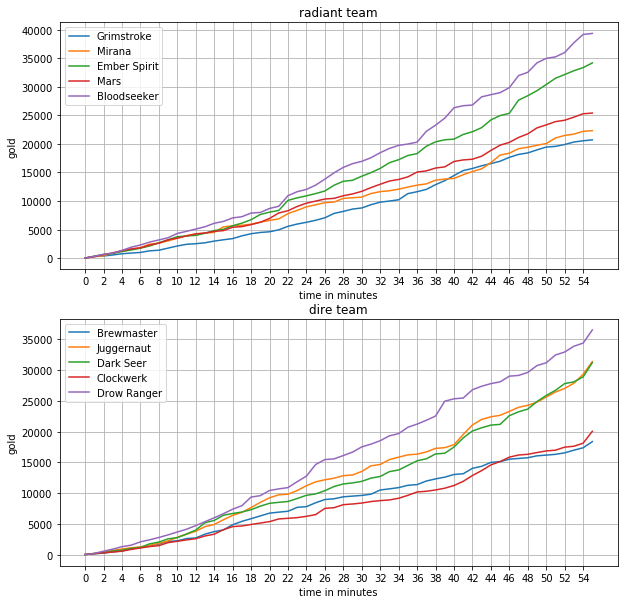

In [57]:
def helperGraph(ax, x_axis, y_axis, str):
    ax.plot(x_axis, y_axis[0][str], label=y_axis[0]['localized_name'])
    ax.plot(x_axis, y_axis[1][str], label=y_axis[1]['localized_name'])
    ax.plot(x_axis, y_axis[2][str], label=y_axis[2]['localized_name'])
    ax.plot(x_axis, y_axis[3][str], label=y_axis[3]['localized_name'])
    ax.plot(x_axis, y_axis[4][str], label=y_axis[4]['localized_name'])
    ax.grid()
    ax.set_xticks(np.arange(np.min(x_axis), np.max(x_axis), 2))
    ax.set_xlabel("time in minutes")
    ax.set_ylabel(str[:-2])
    ax.legend()

def helperName(lst_pls, names):
    for pl in lst_pls:
        i = 0
        while (pl['hero_id'] != names[i]['id']) or (i > 120):
            i += 1
        pl['localized_name'] = names[i]['localized_name']
    
fname = open("hero_names.json",)
dname = json.load(fname)
fname.close()

pls = np.array(data["players"])
radiant_pls = np.array(pls[:5])
helperName(radiant_pls, dname)
dire_pls = np.array(pls[5:])
helperName(dire_pls, dname)

fig_gold = plt.figure(figsize=(10,10))
ax_radiant = fig_gold.add_subplot(2,1,1)
helperGraph(ax_radiant, x, radiant_pls, 'gold_t')
ax_radiant.title.set_text('radiant team')


ax_dire = fig_gold.add_subplot(2,1,2)
helperGraph(ax_dire, x, dire_pls, 'gold_t')
ax_dire.title.set_text('dire team')


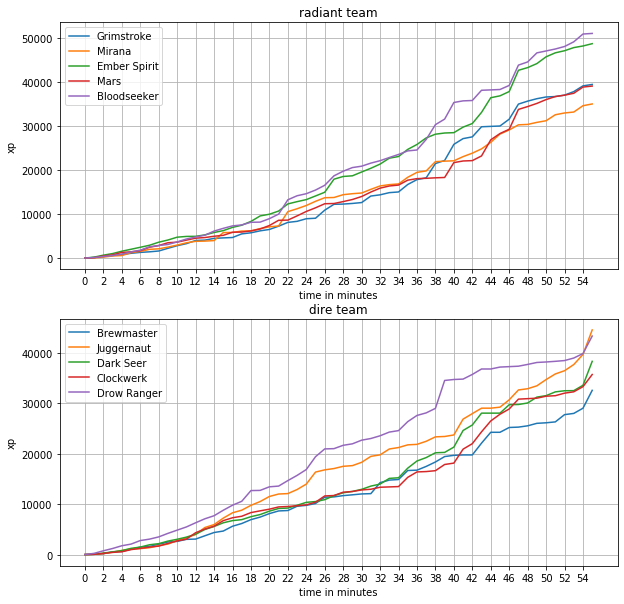

In [58]:
fig_xp = plt.figure(figsize=(10,10))
ax_rad_xp = fig_xp.add_subplot(2,1,1)
helperGraph(ax_rad_xp, x, radiant_pls, 'xp_t')
ax_rad_xp.title.set_text('radiant team')
ax_dire_xp = fig_xp.add_subplot(2,1,2)
helperGraph(ax_dire_xp, x, dire_pls, 'xp_t')
ax_dire_xp.title.set_text('dire team')